<h1 style="text-align: center;">GLOBAL SOLUTION 2024</h1>

## Grupo: Guilherme Pagani (1), Leonardo Garcia (2), Rodrigo Cabrera (3) // RMs: 99445 (1), 99471 (2), 550227 (3).

<h1 style="text-align: center;">Resolução</h1>

### Bibliotecas Necessárias

In [ ]:
%pip install qiskit
%pip install qiskit_aer
%pip install numpy
%pip install pylatexenc
%pip install matplotlib

### Imports Necessários 


In [1]:
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.circuit.library import QFT
import numpy as np
import random as rd
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler, PrimitiveJob
import math


<h1 style="text-align: center;">1. Primeiro Passo</h1>
<strong>
Inicialmente, deve-se projetar um algoritmo que constroi um circuito quantico capaz de receber uma sequencia n de medições de tempo referente ao periodo medido das ondas em uma regiao litoranea (em segundos), converte-las para portas de phase P de acordo com a equação apresentada, obter o periodo correspondente por meio da IQFT e compara-lo com o valor medio dos periodos.
</strong>


### 1.1
*Na seguinte parte, geramos um número aleatório cujo definirá quantos qubits haverá no circuito, esse número aleatório representa medições de tempo, ou seja, quantos períodos teve em certo tempo, adicionamos em uma lista para separar cada item*

In [2]:
medicoes_lista = [] 
n = rd.randint(4,10)

for i in range(n):
    j = round(rd.uniform(2,5),2)
    medicoes_lista.append(j)

print("Número de Medições:",n)
print("Períodos =",medicoes_lista)

Número de Medições: 8
Períodos = [3.23, 4.08, 4.88, 4.72, 2.66, 3.78, 4.79, 2.26]


### 1.2
*Implementação da IQFT*

Circuito IQFT para 3.23


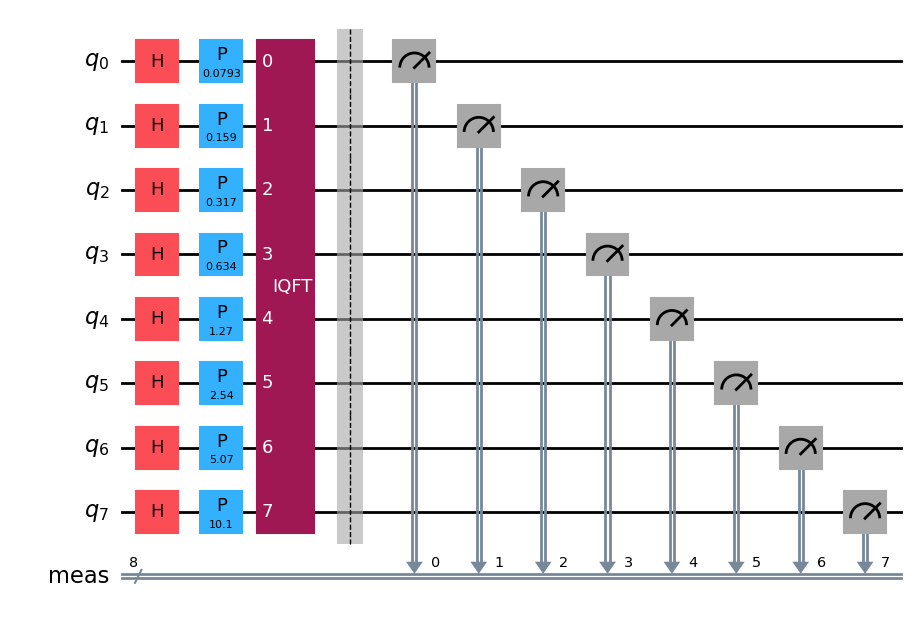

Circuito IQFT para 4.08


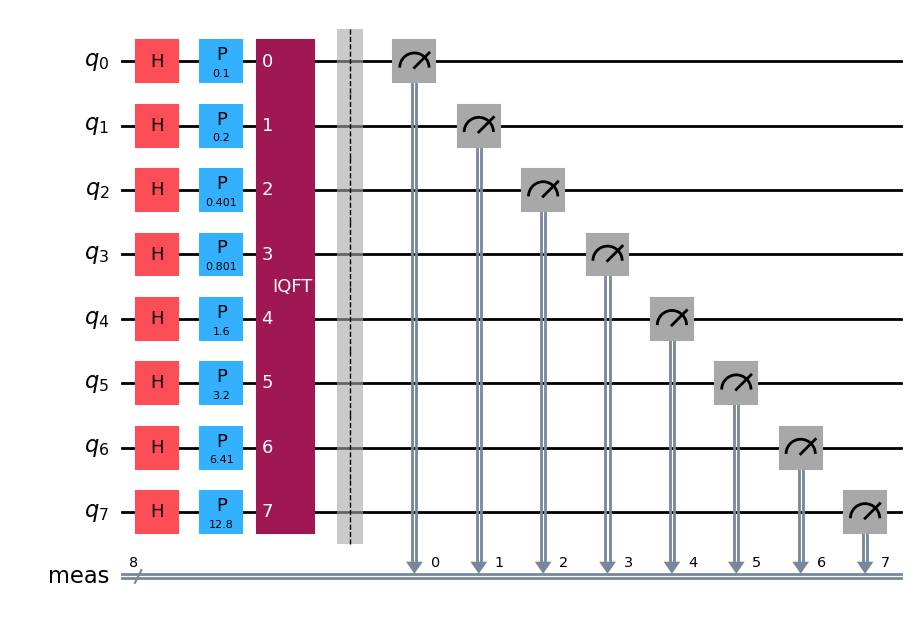

Circuito IQFT para 4.88


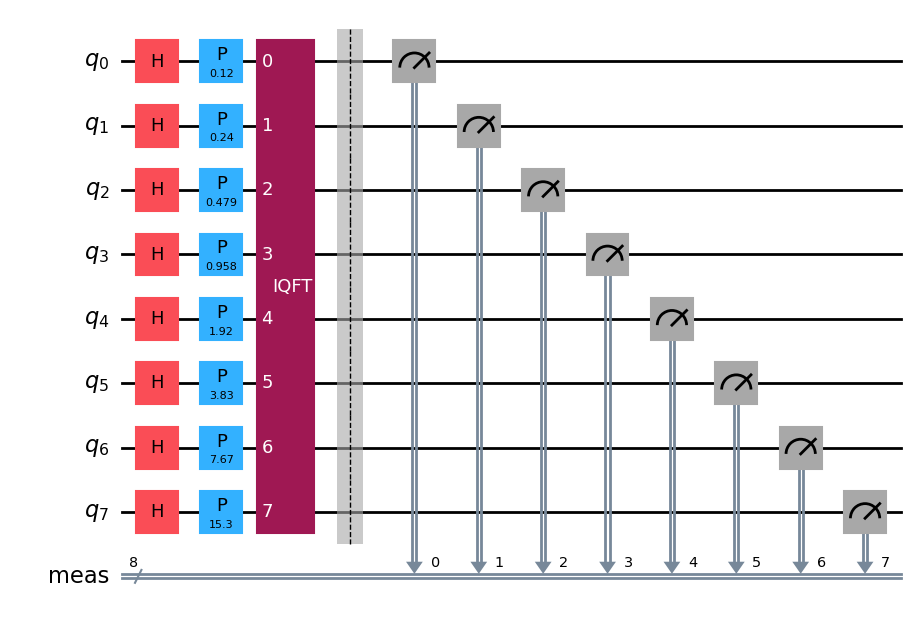

Circuito IQFT para 4.72


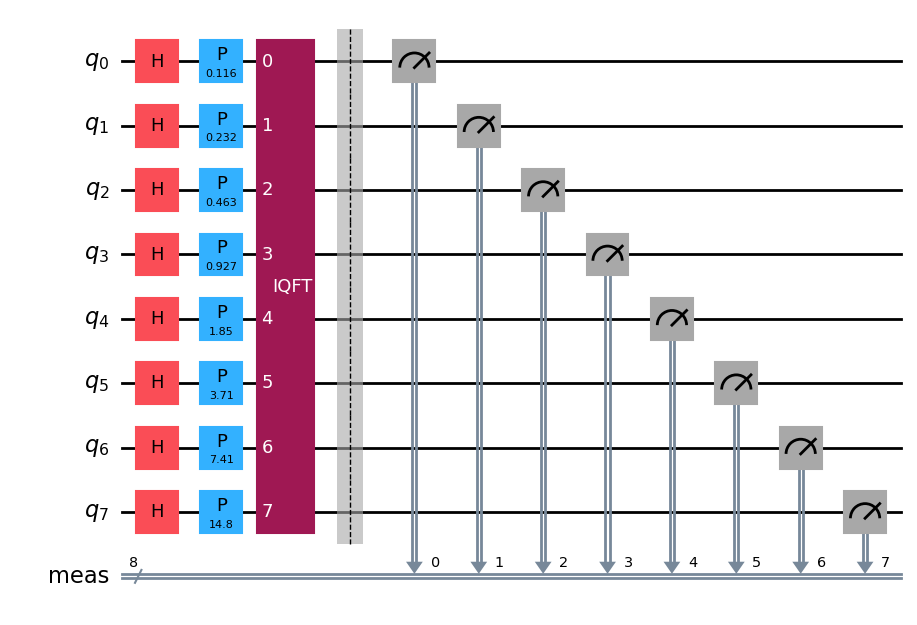

Circuito IQFT para 2.66


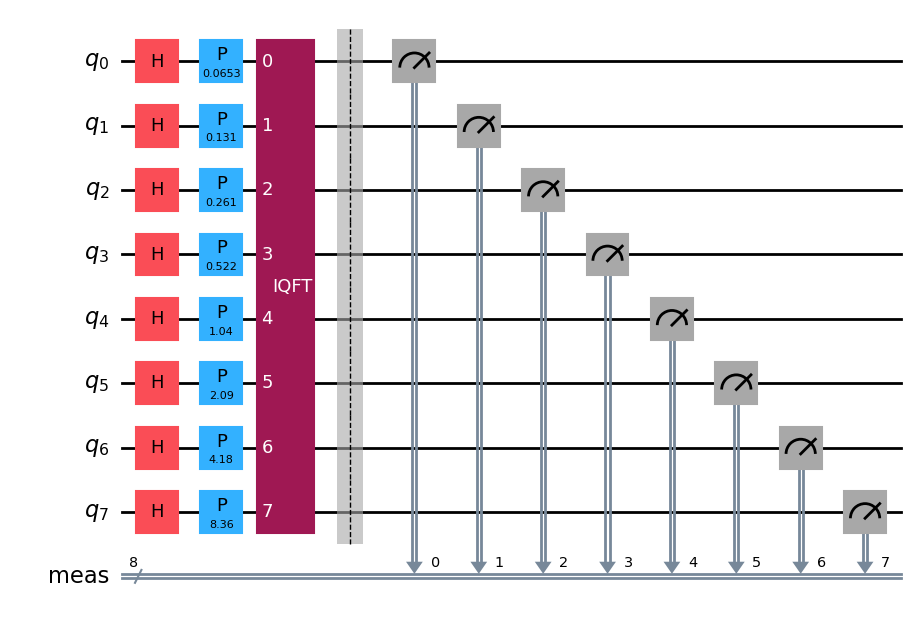

Circuito IQFT para 3.78


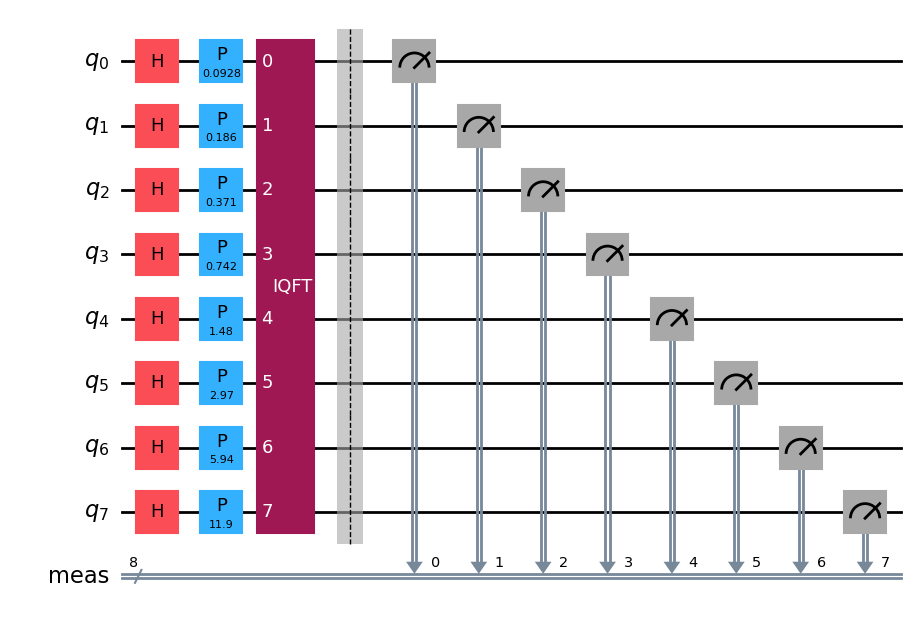

Circuito IQFT para 4.79


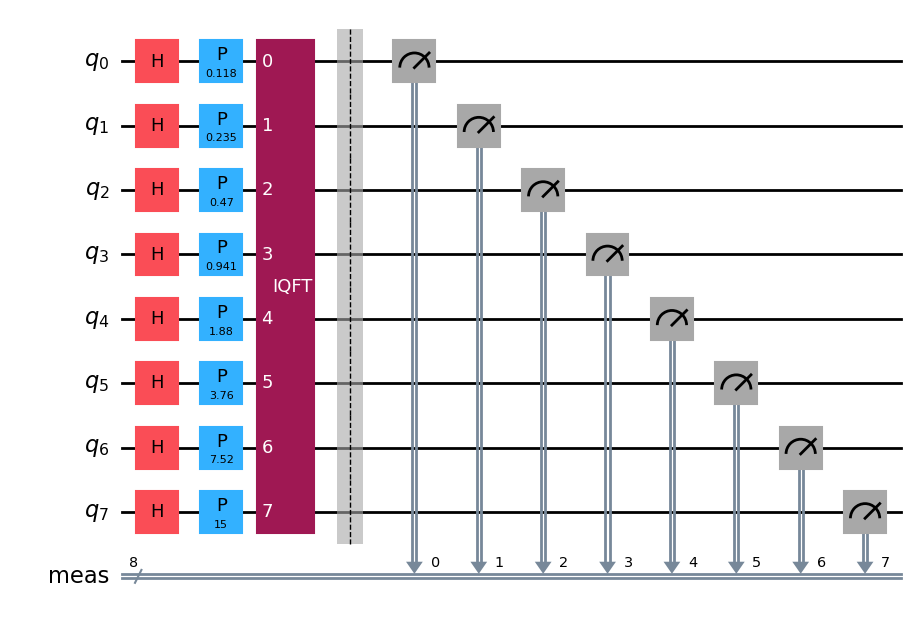

Circuito IQFT para 2.26


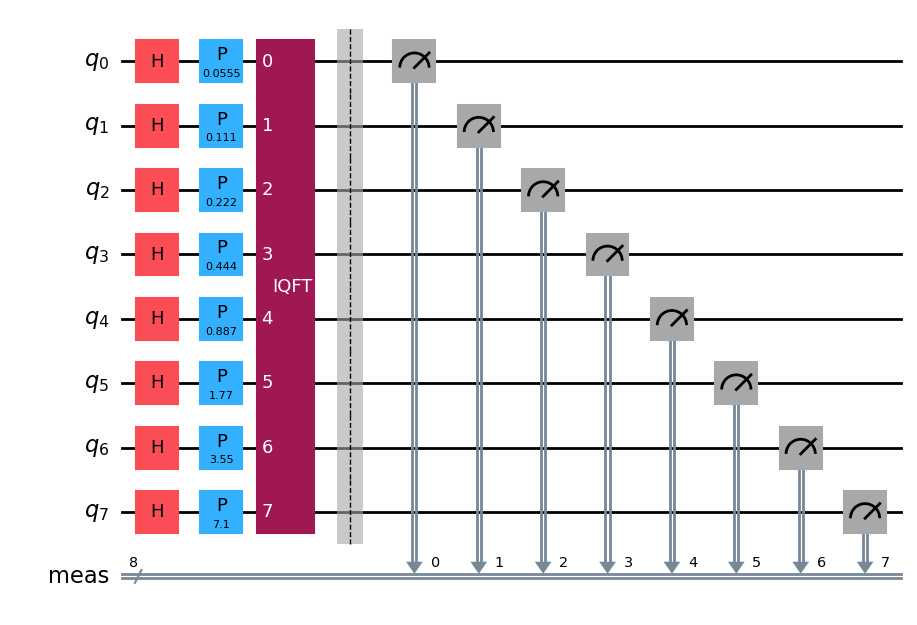

Períodos calculados = [3, 4, 5, 5, 3, 4, 4, 2]


In [3]:
def fourrier_quantum(num_qubits,medicoes_lista):
    
    periodos = []

    for i, periodo in enumerate(medicoes_lista):
        
        qc = QuantumCircuit(num_qubits)

        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)

        qc.append(QFT(num_qubits, inverse=True), qc.qubits)

        qc.measure_all()
        print("Circuito IQFT para",periodo)
        display(qc.draw('mpl'))


        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1)

        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()


        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
        
        

    return periodos

periodos_resultados = fourrier_quantum(n, medicoes_lista)
print("Períodos calculados =", periodos_resultados)

In [4]:
media_periodos = np.mean(medicoes_lista)
media_periodos_iqft = np.mean(periodos_resultados)
print("Média antes do Circuito:",media_periodos)
print("Média após o Circuito",media_periodos_iqft)

Média antes do Circuito: 3.8
Média após o Circuito 3.75


<h1 style="text-align: center;">2. Segundo Passo</h1>
<strong>
Introdução de um erro de +- 10% (aleatório) e repetir o mesmo passo do processo 1. Ao final, deve-se ter discussão do grupo sobre os resultados obtidos de no mínimo dois paragrafos.
</strong>


### 1.1 
Introdução de erros (-10% ou 10% sobre o valor original)

In [5]:
medicoes_com_erro = []
for m in medicoes_lista:
    erro_percentual = rd.uniform(-0.1, 0.1) 
    valor_com_erro = round(m * (1 + erro_percentual), 2)
    medicoes_com_erro.append(valor_com_erro)

print("Períodos com Erro =", medicoes_com_erro)

Períodos com Erro = [3.16, 4.37, 4.57, 4.96, 2.77, 4.08, 5.04, 2.06]


### 1.2 
Implementação do IQFT

Circuito IQFT para 3.16


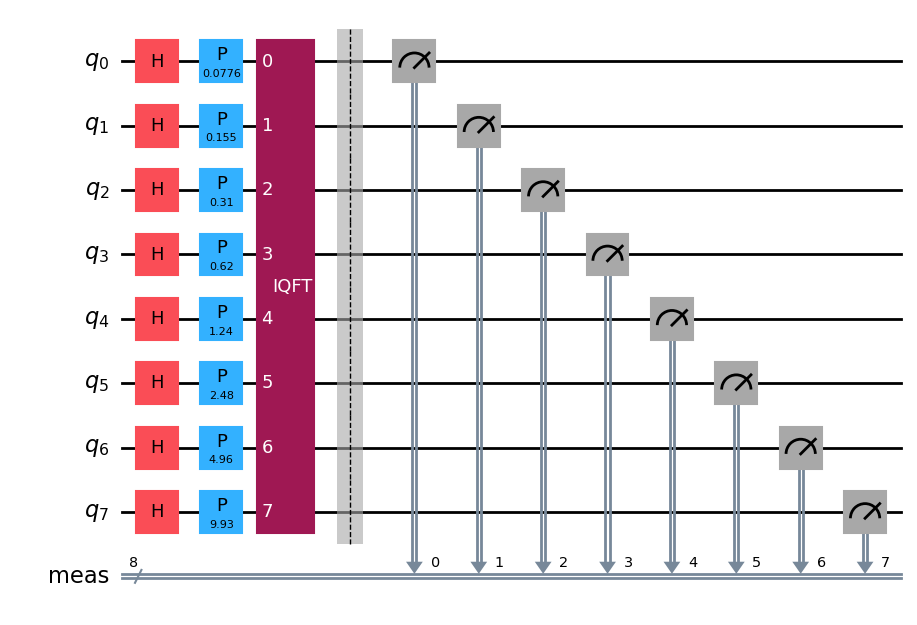

Circuito IQFT para 4.37


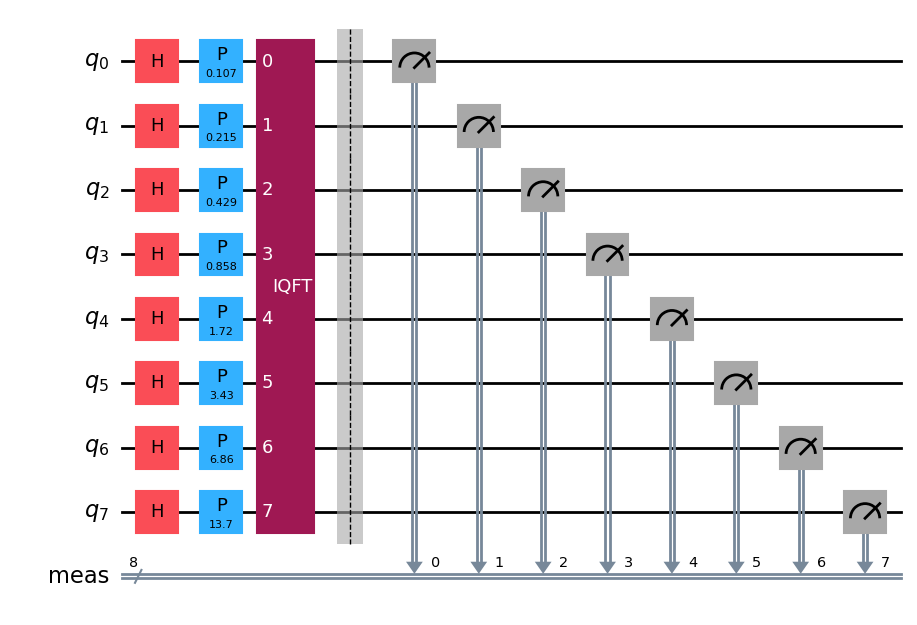

Circuito IQFT para 4.57


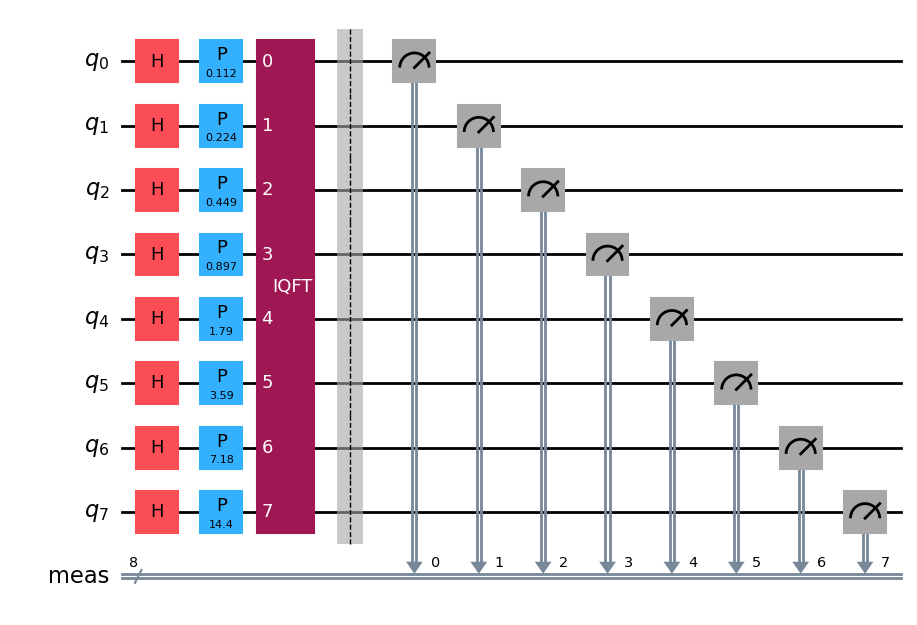

Circuito IQFT para 4.96


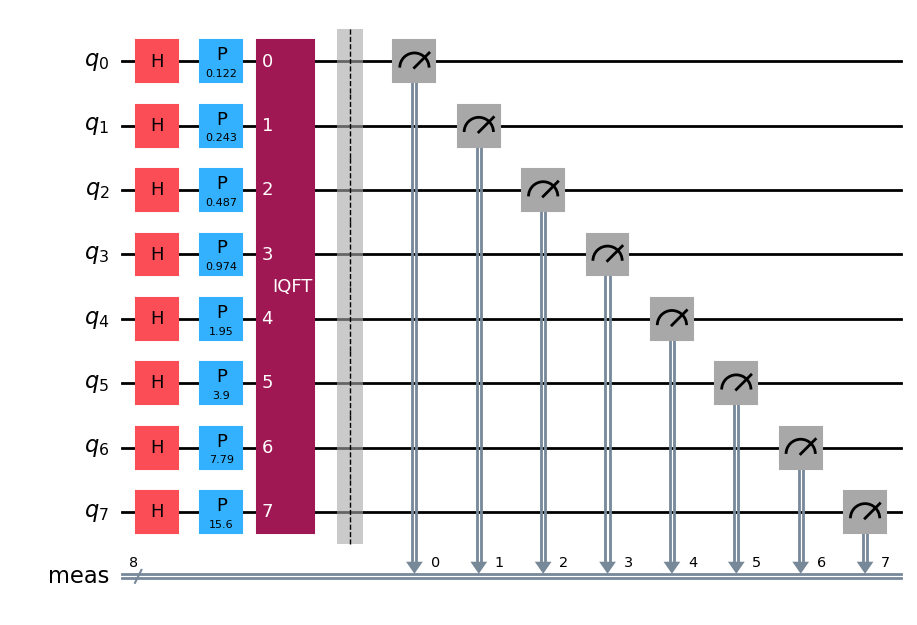

Circuito IQFT para 2.77


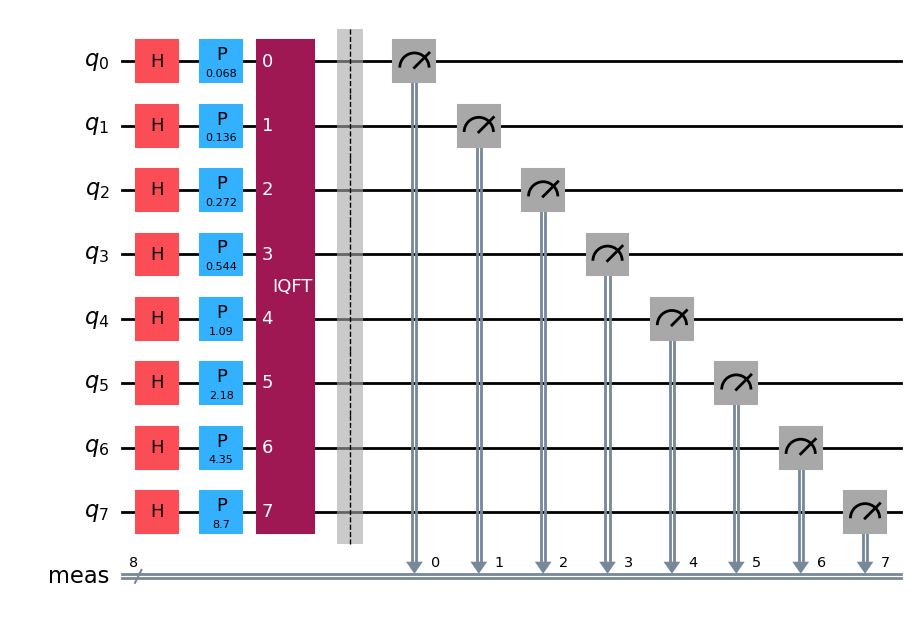

Circuito IQFT para 4.08


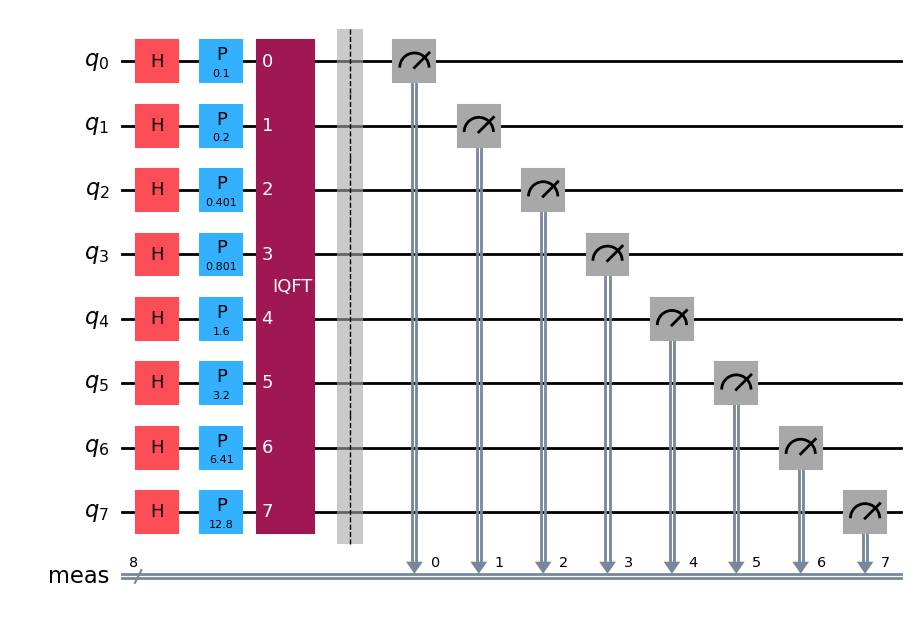

Circuito IQFT para 5.04


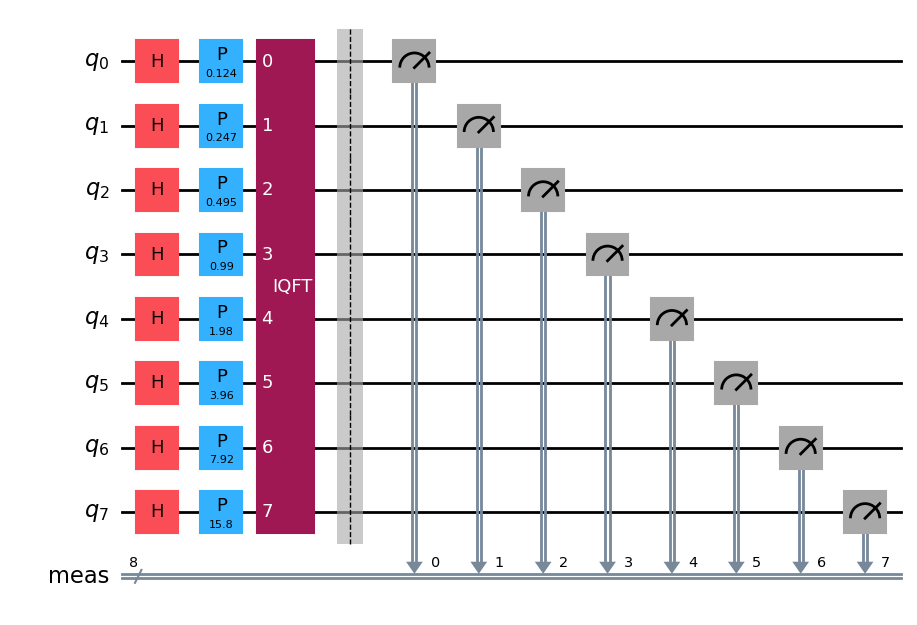

Circuito IQFT para 2.06


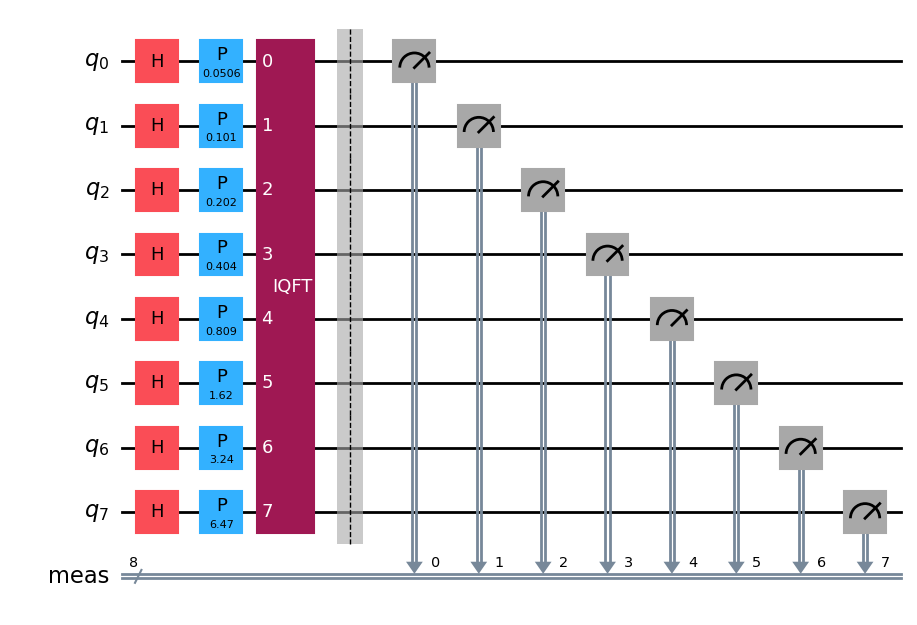

Períodos calculados = [3, 4, 4, 5, 3, 4, 5, 2]


In [6]:
def fourrier_quantum(num_qubits,medicoes_lista):
    
    periodos = []

    for i, periodo in enumerate(medicoes_lista):
        
        qc = QuantumCircuit(num_qubits)

        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)

        qc.append(QFT(num_qubits, inverse=True), qc.qubits)

        qc.measure_all()
        print("Circuito IQFT para",periodo)
        display(qc.draw('mpl'))


        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1)

        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()


        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
        
        

    return periodos

periodos_resultados = fourrier_quantum(n, medicoes_com_erro)
print("Períodos calculados =", periodos_resultados)

In [7]:
media_periodos = np.mean(medicoes_com_erro)
media_periodos_iqft = np.mean(periodos_resultados)
print("Média antes do Circuito:",media_periodos)
print("Média após o Circuito",media_periodos_iqft)

Média antes do Circuito: 3.87625
Média após o Circuito 3.75


<h1 style="text-align: center;"> Discussão dos Resultados Obtidos</h1>
<strong>
As médias no primeiro passo após a introdução dos erros foram as seguintes, para a média antes do circuito ficou em 3.8, após ficou 3.75, após o segundo passo, a média antes do circuito foi para 3.87625, enquanto a média após o circuito continou a mesma. Isso se da pois o IQFT minimiza os impactos de variações em seu circuito, o IQFT tem como função suavizar e até mesmo corrigir esses erros.

Além disso, a IQFT não altera a norma dos estados. No contexto do exercício, os estados clássicos transformados não foram afetados de forma significativa, mantendo-se essencialmente os mesmos, a média tende a permanecer quase inalterada. Isso reflete a natureza unitária do IQFT, que preserva a estrutura global dos dados.
</strong>

<h1 style="text-align: center;">3. Terceiro Passo</h1>
<strong>
Deve-se então, automatizar o processo de construção e simulação do circuito quântico de forma a:
<strong>

### A)
 Receber um número inicial de medições contendo erros de ±10%, correspondente à precisão mínima do circuito para representar os bits do período escolhido (ex.: 25 precisa de 5 bits para ser representado, então n1 = 5)

In [19]:
medicoes_lista = [] 
n = rd.randint(4,10)

for i in range(n):
    j = round(rd.uniform(2,5),2)
    medicoes_lista.append(j)

def calcular_bits(n):
    if n < 1:
        return 0
    return math.floor(math.log2(n)) + 1

num_qubits=calcular_bits(n)
print("Número de Medições:",n)
print("Número de bits necessários:",num_qubits)


Número de Medições: 4
Número de bits necessários: 3


In [20]:
medicoes_com_erro = []
for m in medicoes_lista:
    erro_percentual = rd.uniform(-0.1, 0.1) 
    valor_com_erro = round(m * (1 + erro_percentual), 2)
    medicoes_com_erro.append(valor_com_erro)

print("Períodos com Erro =", medicoes_com_erro)

Períodos com Erro = [4.68, 4.59, 3.62, 4.6]


### B)
Realizar o cálculo da média das medições e a obtenção do período por meio da IQFT

Circuito IQFT para 4.68


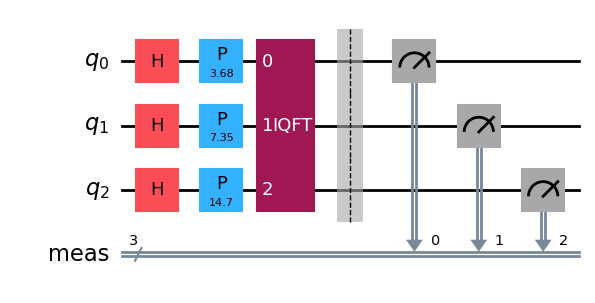

Circuito IQFT para 4.59


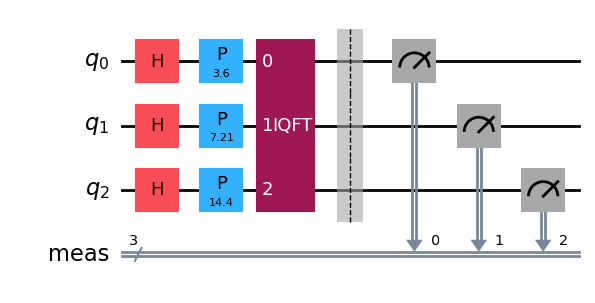

Circuito IQFT para 3.62


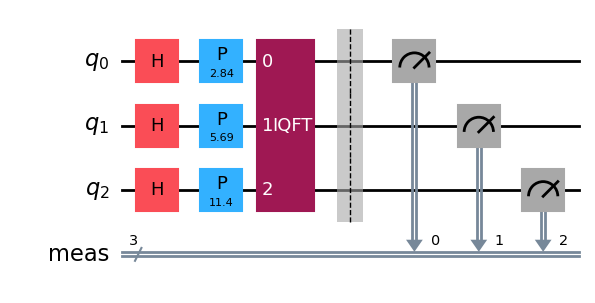

Circuito IQFT para 4.6


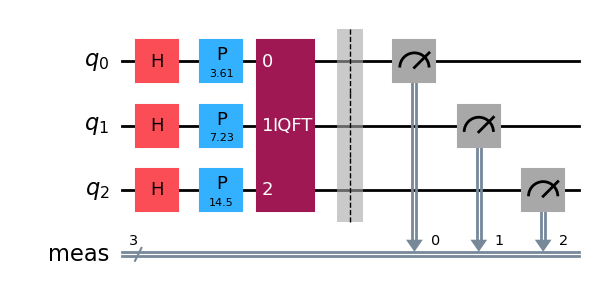

Períodos calculados = [4, 5, 3, 5]


In [21]:
def fourrier_quantum(num_qubits,medicoes_lista):
    
    periodos = []

    for i, periodo in enumerate(medicoes_lista):
        
        qc = QuantumCircuit(num_qubits)

        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)

        qc.append(QFT(num_qubits, inverse=True), qc.qubits)

        qc.measure_all()
        print("Circuito IQFT para",periodo)
        display(qc.draw('mpl'))


        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1)

        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()


        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
        
        

    return periodos

periodos_resultados = fourrier_quantum(num_qubits, medicoes_com_erro)
print("Períodos calculados =", periodos_resultados)

In [22]:
media_periodos = np.mean(medicoes_com_erro)
media_periodos_iqft = np.mean(periodos_resultados)
print("Média antes do Circuito:",media_periodos)
print("Média após o Circuito",media_periodos_iqft)

Média antes do Circuito: 4.3725000000000005
Média após o Circuito 4.25


### C)
Comparar o valor da média com o período obtido

* Se a diferença for superior a 10%, adicionar uma nova medição em um novo bit e repetir o processo
* Se a diferença for inferior a 10%, encerrar o loop, indicar:
   * O valor do período obtido via média e IQFT
   * O número de bits (medições) utilizados
   * O desvio padrão das medições

Circuito IQFT para 4.23


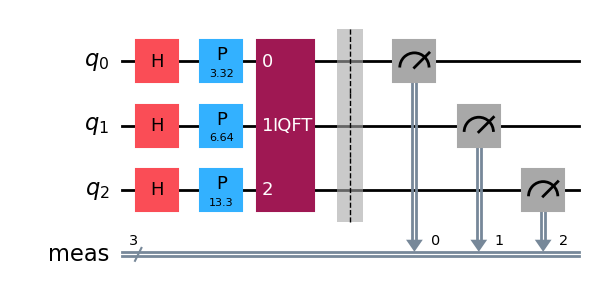

Circuito IQFT para 3.99


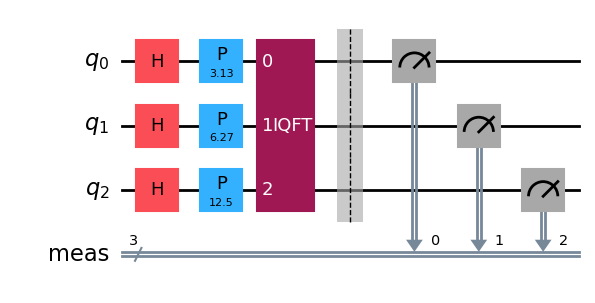

Circuito IQFT para 3.51


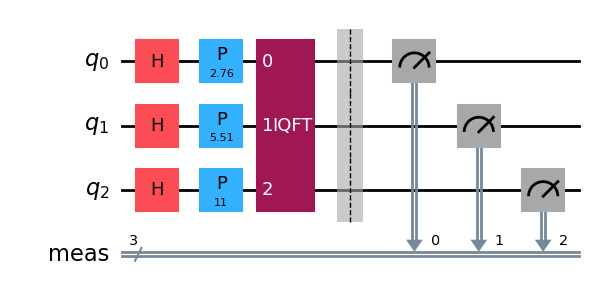

Circuito IQFT para 3.97


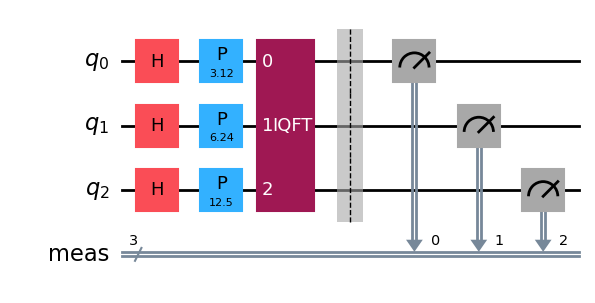

  Média antes do circuito: 3.93
  Média após o circuito: 3.75
  Diferença percentual: 4.46%

Resultados Finais:
  Número de bits utilizados: 3
  Média final das medições: 3.93
  Média final IQFT: 3.75
  Desvio padrão das medições: 0.26
  Desvio padrão das medições IQFT: 0.43


In [24]:
num_qubits = calcular_bits(len(medicoes_com_erro))
tolerancia = 0.1
diferenca_percentual = float('inf')  

while diferenca_percentual > tolerancia:
   
    periodos_resultados = fourrier_quantum(num_qubits, medicoes_com_erro)
    
    media_periodos = np.mean(medicoes_com_erro)
    media_periodos_iqft = np.mean(periodos_resultados)

    diferenca_percentual = abs(media_periodos - media_periodos_iqft) / media_periodos
    print(f"  Média antes do circuito: {media_periodos:.2f}")
    print(f"  Média após o circuito: {media_periodos_iqft:.2f}")
    print(f"  Diferença percentual: {diferenca_percentual:.2%}")
    
    if diferenca_percentual > tolerancia:
        num_qubits += 1
    else:
        break

desvio_padrao = np.std(medicoes_com_erro)
desvio_padrao_iqft = np.std(periodos_resultados)

print("\nResultados Finais:")
print(f"  Número de bits utilizados: {num_qubits}")
print(f"  Média final das medições: {media_periodos:.2f}")
print(f"  Média final IQFT: {media_periodos_iqft:.2f}")
print(f"  Desvio padrão das medições: {desvio_padrao:.2f}")
print(f"  Desvio padrão das medições IQFT: {desvio_padrao_iqft:.2f}")
